# $\color{purple}{\text{FOMC Statements (2007-2022): Reading Between the Lines}}$

**Alexander Ng & Philip Tanofsky**

__Data 620 - Web Analytics__

**May 22, 2022**


<img src = "../raw/FOMC_Meeting.jpg" width="1200" />

## $\color{blue}{\text{Executive Summary}}$



The Federal Open Market Committee (FOMC) produces policy statements that are closely analyzed by financial markets, politicians and business leaders.
We analyze a corpus of 126 FOMC statements from Jan 2007-May 2022 using natural language processing methods and compare them to financial market variables, economic indicators and known policy initiatives of the Federal Reserve.

Using Latent Dirichlet Allocation (LDA), we find a strong link between topics and the four programs of quantitative easing (QE) that the FOMC undertook to support the economy and financial markets from 2009-2022.  Although the high frequency words of each topic are unhelpful in identifying the QE regimes, by comparing the time periods when each topic has high weight within the corpus, we are able to demonstrate close alignment between the announcement date of each QE program and the inception of a new topic.

Using a financial sentiment dictionary, we find time variation of sentiment within the FOMC statement corpus that is consistent with real-world events. 

$\color{red}{\text{Add your text here - Phil}}$




## $\color{blue}{\text{1 - Introduction}}$

* 1 - Prior Research
* 2 - Exploratory Data Analysis and Wrangling
* 3 - LDA Model Topics correspond to QE Waves
* 4 - FOMC Sentiment Analysis
* 5 - Discussion

The Federal Open Market Committee (FOMC) is the key decision making body at the US Federal Reserve.  It sets the target Federal Funds interest rate, sets monetary policy to meet its dual mandate on managing inflation to a moderate and stable target of 2 percent and maximum employment consistent with the inflation target.  The FOMC statement is released every 6-8 weeks and announces the new target interest rate, views of current and future economic conditions and provides an outlook for future rates and asset purchases.  FOMC statements affect financial markets and business investment decisions.

A great deal of academic research has investigated the FOMC statements, minutes, transcripts.   Machine learning and time series studies have been applied to FOMC corpora as well.  Sentiment analysis and study of FOMC communications impact on markets and economics have been extensive.  The related work cited below is just a sample.
[Rosa (2013)](#Rossa2013) finds that FOMC statements move asset prices by increasing volatility of 10 year Treasury yields, SP500 Index returns, Euro-USD, Swiss Franc-USD, Japanese Yen-USD FX rates within 5 minutes of the statements release.    [Lucca and Trebbi (2009)](#LuccaTrebbi2009)    find that the hawkish or dovish tone of the FOMC statements can influence longer maturity Treasury rates.
[Gu, Kurov, Wolfe (2018)](#GuKurovWolf2018) find a 49 basis point increase in U.S. stock prices within the first hour after recent FOMC announcements.   [Cieslak, Morse, Vissing-Jorgensen (2019)](#CieslakMorseVissingJorgensen2019) shows much of the U.S. equity premium since 1994 has been earned on even numbered weeks tied to the FOMC meeting cycle.   They propose a causal explanation in terms of informal communications from the Fed.   Sentiment analysis using the positive and negative tone of the FOMC minutes using the financially oriented Loughran-McDonald dictionary has been demonstrated by [Cannon (2015)](#Cannon2015) to have significant correlation to real economic indicators.   Cannon showed a 26% positive correlation between the sentiment of Fed members to the Chicago Fed National Activity Index (CFNAI).


[Gutierrez, et. al. 2020](#Gutierrez2020) apply LDA analysis to FOMC statements to compare topics between the 2008 Financial Crisis and the 2020 Covid-19 pandemic.  They find similarities in concern in the topics associated with each crisis period.  Moreover, our technical approach using `Python`, `gensim` and `pyLDAvis` closely follows the approach of [Gutierrez, et. al. 2020](#Gutierrez2020).  However, we disagree on two key conclusions:  (a) that the Covid-19 pandemic was a more severe crisis than the 2008 Financial Crisis and (b) the absence of a clear topic interpretation.   
[Lagana, 2020](#Lagana2020) applies LDA analysis to both FOMC statements and FOMC minutes to identify variation in topics as a result of a change of policy in forward guidance by the Federal Reserve.   Her work finds no evidence of change in topic weight related to transparency in the statements.   [Jegadeesh and Wu (2015)](#JegadeeshWu2017) applied LDA to FOMC minutes and statements.  They find minutes are informative and they conduct a detailed event study between minutes releases and intraday asset returns.  They find a relationship between topic content and market volatility.  However, they argue that topic modeling is inappropriate for FOMC statements because of their brevity.   We disagree with the latter point as we find evidence that topics linked to Quantitative Easing programs.


In [section 2](#section2), we prepare the dataset and explore the FOMC statement characteristics and the time series of relevant macroeconomic and financial variables.  Then, we produce a Latent Dirichlet Allocation topic model of the corpus showing the topic identification to Quantitative Easing programs in [Section 3](#section3).   In [Section 4](#section4), we extract the FOMC statement sentiment and consider long term regressions of sentiment against financial and economic variables.  [Section 5](#section5) summarizes our findings and Section 7 contains detailed tables of LDA topic weights, sentiment data.



## $\color{blue}{\text{2 - Preliminaries and Exploratory Data Analysis}}$  <a id='section2'></a> 

This section prepares the datasets and explores the some trends of the FOMC statements and their related macroeconomic and financial timeseries from the 2007-2022 period.

*  FOMC Corpus
*  FRED Time Series
*  Time Dynamics - Leads and Lags
*  Visualizating the Data






### $\color{green}{\text{2.1 - FOMC Corpus}}$

In this section, we describe the data preparation steps to obtain the FOMC statement corpus and the time series data sets.  

$\color{red}{\text{Phil - ADD YOUR TEXT HERE}}$

### $\color{green}{\text{2.2 - FRED Time Series}}$

#### Data Source

The source of the time series data is the Federal Reserve Economic Data site [(FRED economic database)](https://fred.stlouisfed.org/) operated by the Federal Reserve Bank of St. Louis.   We consider 4 financial time series from the FRED database which represent interest rates, credit, inflation and equity markets.

*  **BAA10Y**, Moody's Seasoned Baa Corporate Bond yield relative to yield on 10-year Treasury Constant Maturities.  

*  **T10YIE**, the breakeven inflation rate represents the expected inflation derived from 10-Year Treasury constant maturity securities minus the 10-Year Treasury Inflation-Indexed Constant Maturity index.  It represents market expectations of average inflation over the next 10 years.

*  **WILL5000IND**, the total returns of the Wilshire 5000 Stock Index, observed daily, including reinvested dividends.  This is a broad measure of the entire US stock market.

*  **DGS10**, the yield on 10-year Treasury Constant Maturities.

Each of the above financial time series is observed at daily interval and reflected the values at market close 4pm EST.


We also consider 3 macroeconomic variables which are published at monthly frequency for the US economy.  These are also sourced from the FRED database.

*  **UNRATE**, the U-3 measure of labor unemployment as published monthly by the Bureau of Labor Statistics (BLS), expressed as a percentage of the labor force of people 16 years of age or older, who are not in institutions or active military duty.  This statistic is reported for the prior month.

*  **CIVPART**, the Labor Force Participation Rate, measures the percentage of people in the labor force as a percentage of population of civilian noninstitutionalized people.

*  **PCEPILFE**, the Personal Consumption Expenditures Excluding Food and Energy (Chain-Type Price Index), indexed to 2012=100, is the preferred measure by the FOMC of price increases in the US.   It is a measure of the price paid for goods and services in the US.  It measures actual inflation on a backward looking basis.


We do NOT include real GDP as an regression variable for several important reasons:

*  GDP is published quarterly, but FOMC sentiment is published every 6-8 weeks.  Thus, sentiment will change regardless of the prior GDP quarterly figure.   The mismatch in periodicity cannot easily be resolved.

*  GDP is updated 3 times as an initial release, secondary and third release.   Each release includes more complete information to estimate Gross Domestic Product.  While each revision is known to influence markets, the value of each revision is serially correlated to earlier releases.  

*  GDP release schedules don't follow a simple chronological pattern.


This section loads, imputes missing values and constructs the time series of returns or indices for regression and comparison with the sentiment indicator.

The section also demonstrates the regression between sentiment and financial or macroeconomic variables.


#### Cleaning the Data

We process each FRED time series but forward filling each missing value.  Missing values occur on market holidays.
Thus, forward filling avoids backtest look-ahead bias.  We also need to coerce the data series from string to numeric which is done using `pandas.to_numeric()` call.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#from pandas import read_csv

fred_dir = "../fred/"

def process_fred_dateseries( csv_file, series_name ):

#  header = 0  the header row is located at row index 0
#  parse_dates - dates are at column index 0
#  index_col  -  first column is the index for the Time Series object
#
# ----------------------------------------------------
    
    df = pd.read_csv(csv_file, header = 0, parse_dates = [0], index_col = 0 )
    
    # convert blank or missing data to nan and other values from string to numeric
    df[series_name] = pd.to_numeric( df[series_name], errors = 'coerce')
    
    # Fill forward any missing data on a business holiday.
    #
    df.fillna( method = "ffill", inplace = True )
    
    df.reset_index(inplace=True)
    
    return df

#
#   Series filenames are <SERIES-KEY>.csv
#
#   Series file content:  <date>, <series-key>
# ----------------------------------------------------------------------------
def load_and_display_fred_dateseries( series_list , show_plot = False):
    
    dict_series = { }
    
    for series in series_list:
    
        sfilename = fred_dir + series + ".csv"
        
        df_series = process_fred_dateseries( sfilename, series)
        
        dict_series.update({ series : df_series } )
        
        if show_plot:
            df_series.plot( y = series )
            plt.show()
        
    return dict_series


When we run the above function on our list of FRED time series, the function returns the cleansed, imputed data series in a single object - a dictionary.

That dictionary contains a sequence of key-value pairs:

*  `key`:  the series name 

*  `value`:  pandas DataFrame whose column is the imputed data value as the series.

In addition, when we set the parameter `show_plot` = `True`, we obtain a time series plot of each series as a side-effect.


In [2]:
#
#  All the data series to be used in regression analysis.  
# -------------------------------------------------------------------------------------------
series_list = ["BAA10Y", "T10YIE", "WILL5000IND", "DGS10", "UNRATE","CIVPART",   "PCEPILFE"]

#
# Store the data series in a dictionary with:
#    key:   series key
#    value: DataFrame of dates, raw time series valuees
# 
dict_series = load_and_display_fred_dateseries(series_list, show_plot = False)


## Time Dynamics

The FOMC meetings occur at 2pm EST.   We generate a series of returns for each financial variable and changes for each economic variable.

We will check if FOMC sentiment appears to influence future changes in financial markets.
For the financial variables, we consider percentage changes at 2-day and 5-day intervals.   These changes will be regressed against changes in FOMC sentiment to detect relationships.   

We will check if FOMC sentiments appears to be influenced by past changes in economic variables.
We will measure monthly changes in personal consumption, unemployment and labor participation rates and see if past changes appear to influence future changes in FOMC sentiment.

Additional data columns are appended to the dataframe of each series within the series dictionary object.   

We also visualize each resultant time series of returns along with the original time series.

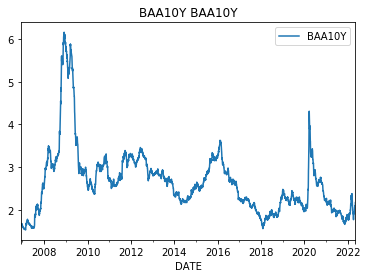

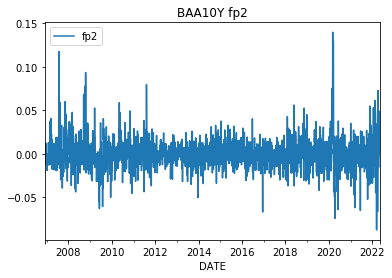

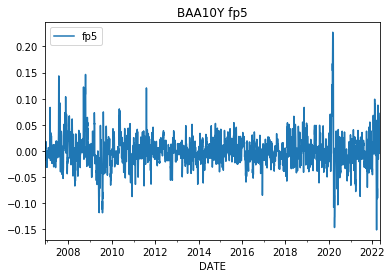

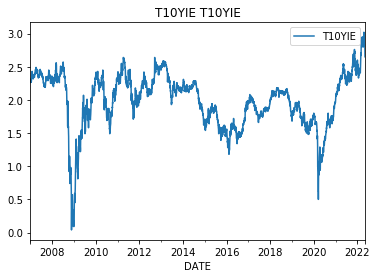

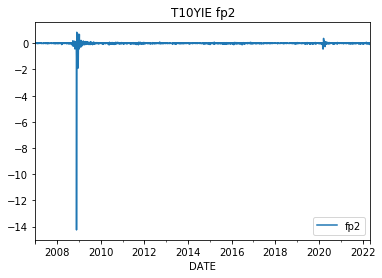

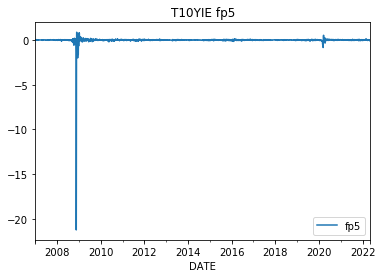

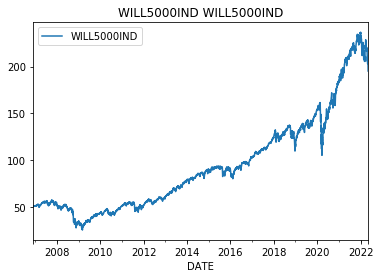

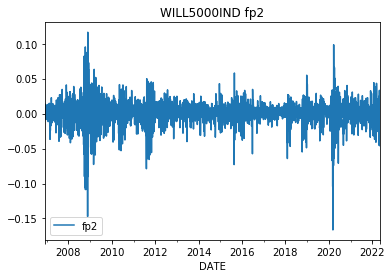

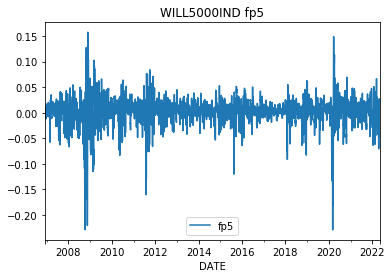

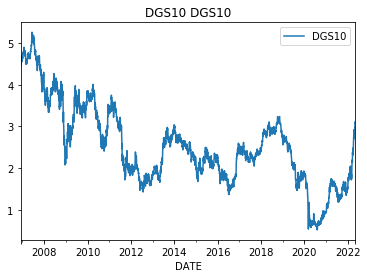

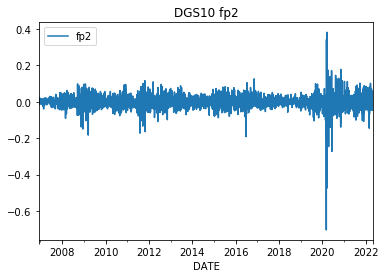

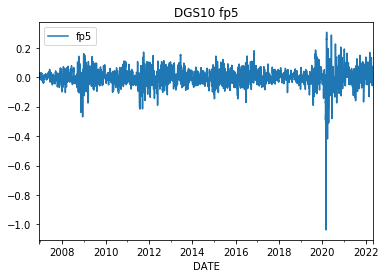

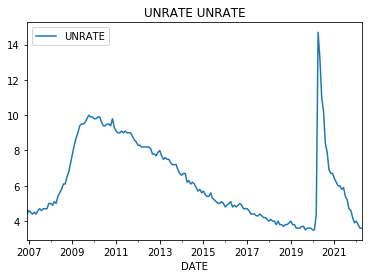

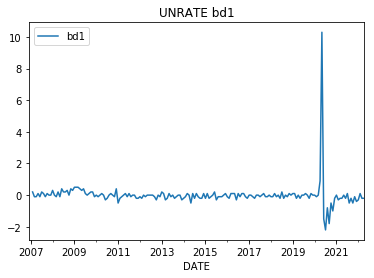

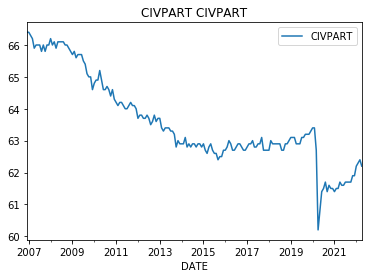

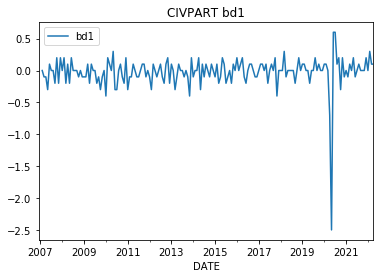

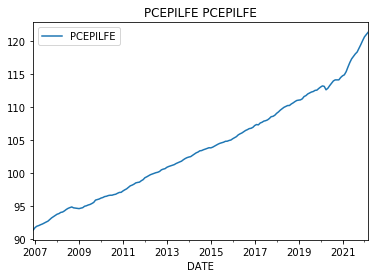

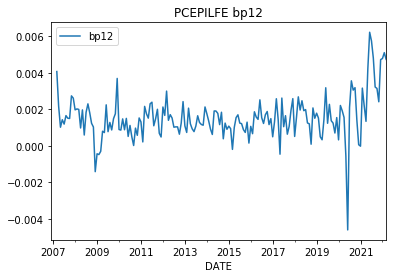

In [4]:


def transform_fred_dateseries( series_dict, series_key, period, is_pct , col_name , forward_shift = 1):
    
    df_series = series_dict[ series_key]
    
    if is_pct:
        df_series[ col_name ] = df_series[series_key].pct_change( periods = period )
        if period < 0:
            df_series[ col_name ] = -1 * df_series[ col_name]
        df_series[ col_name ] = df_series[col_name ].shift( periods = forward_shift)  # Forward shift
    else:
        df_series[ col_name ] = df_series[series_key].diff( periods = period )
        
        if period < 0:
            df_series[ col_name ] = -1 * df_series[ col_name]
        df_series[ col_name ] = df_series[col_name ].shift( periods = forward_shift)  # Forward shift

transform_fred_dateseries( dict_series, "BAA10Y", -2,  is_pct = True, col_name = "fp2")
transform_fred_dateseries( dict_series, "BAA10Y", -5,  is_pct = True, col_name = "fp5")

transform_fred_dateseries( dict_series, "T10YIE", -2,  is_pct = True, col_name = "fp2")
transform_fred_dateseries( dict_series, "T10YIE", -5,  is_pct = True, col_name = "fp5")

transform_fred_dateseries( dict_series, "WILL5000IND", -2,  is_pct = True, col_name = "fp2")
transform_fred_dateseries( dict_series, "WILL5000IND", -5,  is_pct = True, col_name = "fp5")

transform_fred_dateseries( dict_series, "DGS10", -2,  is_pct = True, col_name = "fp2")
transform_fred_dateseries( dict_series, "DGS10", -5,  is_pct = True, col_name = "fp5")

#
# Look back 1 month for Labor Participation Rate.  Use absolute rate change.
# 
# Join the monthly FOMC meeting to the same-month-CIVPART value and compare:
# sentiment Y of the FOMC and its prior-period change dY vs.  bd1 of the same-month-CIVPART 
#  
# Check if bd1 predicts dY
transform_fred_dateseries( dict_series, "CIVPART", 1,  is_pct = False, col_name = "bd1")

# Join the monthly FOMC meeting to the same-month-UNRATE value and compare:
# sentiment Y of the FOMC and its prior-period change dY vs.  bd1 of the same-month-UNRATE
#  
# Check if bd1 predicts dY
transform_fred_dateseries( dict_series, "UNRATE", 1,  is_pct = False, col_name = "bd1")

#
#  PCEPILFE is released monthly on a backward looking basis near the end of the following month.
#  E.g.
#        PCE[ Jan 2022] is published late Feb 2022 and would be available for an March 2022 FOMC meeting.
#
#  So we would shift the 12 month change in Jan 2022 PCEILFE to March 2022 bp12 data point.
#  i.e. use a 2 month forward shift
#
#  Regress if bp12 predicts change in sentiment dY
transform_fred_dateseries( dict_series, "PCEPILFE", 1,  is_pct = True, col_name = "bp12", forward_shift = 2)


#
# Display plots of all the time series and their transforms.
# 
# Outer loop is the series key
for v in dict_series:
    
    # inner loop is all data columns
    # only works if date is an index - not a column
    for u in dict_series[v]:
        
        if u != "DATE":
            dict_series[v].plot( x = "DATE", y = u)
            plt.title(v + " " + u)
            plt.show()


#### $\color{red}{\text{NOTE - the section Specifying the Regression Lagged/Leading Series Not Added here yet}}$

### $\color{green}{\text{2.3 - Exploratory Data Analysis}}$

We consider some aspects over this lengthy period:

*   the linguistic patterns of FOMC statements in different regimes
*   the federal funds target rate over this period.  This rate is set within each FOMC statement and is viewed as an `output` of the FOMC process.
*   the macroeconomic variables including economic growth, inflation and labor market conditions.  These indicators are key `inputs` to the FOMC process.
*   financial market variables are both `inputs` and responses to the FOMC process.

### Linguistic Patterns

As the chairperson and the members of the FOMC committee write and/or approve the text language, we expect textual variations due to the chairperson.
The below table and chart shows the FOMC policy statement length (in words) by chairperson and time.

*  Ben Bernanke was the Federal Reserve chairman from 2006 - 2014.  (https://www.federalreservehistory.org/people/ben-s-bernanke)
*  Janet Yellen was the Federal Reserve chairwoman from 2014 - 2018.  (https://www.federalreservehistory.org/people/janet-l-yellen)
*  Jerome Powell is the current Federal Reserve chairman from 2018 - present.  (https://www.federalreservehistory.org/people/jerome-h-powell)

Stylistically, we see that the length of statements during Bernanke's chairmanship increased in length from 2007-2014 due to a desire to provide greater transparency to financial markets and decision makers.  Overall, his statements averaged 442 words each but increased from 200 to nearly 900 at their peak.

Janet Yellen's statements grew in length and reading complexity.  Her statements averaged 602 word but declined over time.  According to [Hernandez & Shell](https://research.stlouisfed.org/publications/economic-synopses/2014/11/05/the-rising-complexity-of-the-fomc-statement/), the reading complexity of Yellen's statements reached grade level 18 and 19 using the Flesch-Kincaid index.  This implied Yellen's statements required 3-4 years of post-graduate education to be understood.

Powell's statements declined in length and reading complexity with an average statement length of 407 words during his tenure.


In [5]:
%matplotlib inline

In [6]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import logging
logging.disable()

In [7]:
import io
import os.path
import math
#import requests
#from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import gensim
import gensim.corpora as corpora
from gensim import models
import matplotlib.pyplot as plt
#import spacy
from pprint import pprint
from wordcloud import WordCloud
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import seaborn as sns
import re as re
import smart_open

# Prepare corpus
derived_data_dir = "../derived"

fomc_statements_file = derived_data_dir + "/" + "FOMC_statements.csv"

df_fomc_statements_raw = pd.read_csv( fomc_statements_file )

docs = df_fomc_statements_raw.text

Text(0.5,1,'FOMC Statement Length by Chairperson')

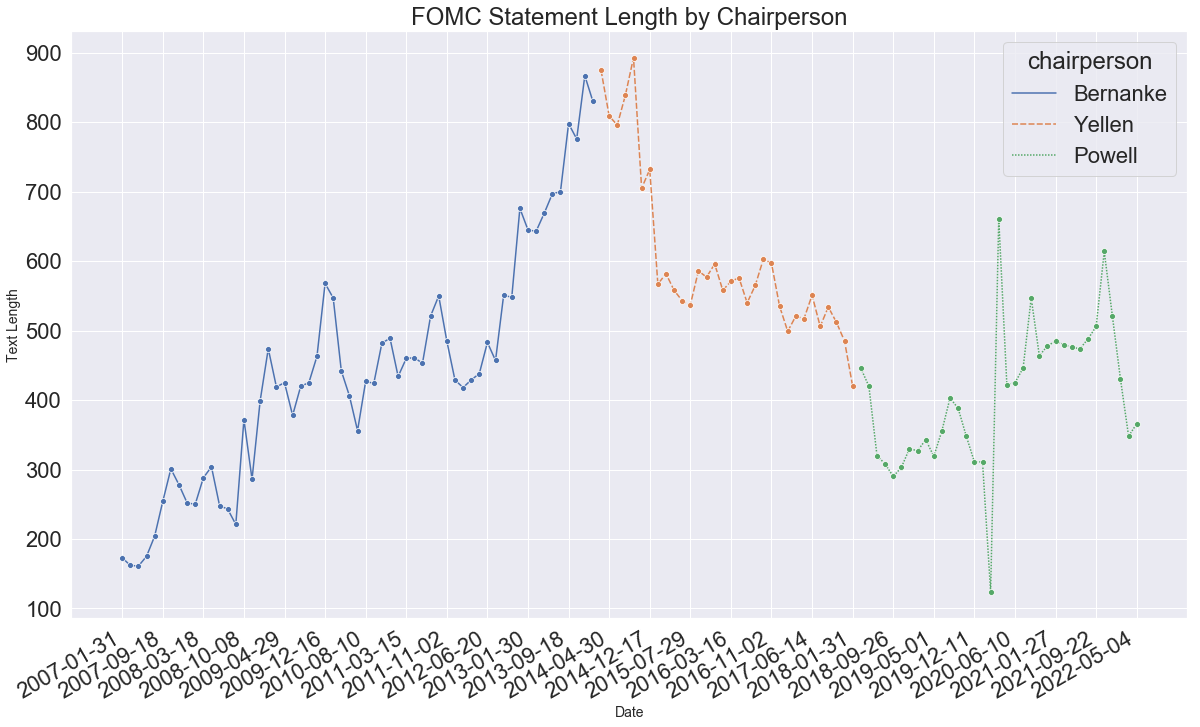

In [9]:
freq = 5
fig, ax = plt.subplots()
sns.set( rc = { 'figure.figsize' : ( 20, 12 ) } )
sns.set( font_scale = 2 )
p = sns.lineplot( x = 'date', y = 'length', hue = 'chairperson' , 
             style  = 'chairperson' ,
             marker = 'o', data = df_fomc_statements_raw, ax = ax )

p.set_xlabel( "Date", fontsize = 14 )
p.set_ylabel( "Text Length", fontsize = 14 )

ax.set_xticklabels( df_fomc_statements_raw.iloc[::freq].date )
xtix = ax.get_xticks()
ax.set_xticks( xtix[::freq ] )
fig.autofmt_xdate()

plt.title("FOMC Statement Length by Chairperson" )

In [10]:
#
# Display average FOMC statement length by Chairperson
heading_properties = [('font-size', '18px')]
cell_properties = [('font-size', '16px')]
dfstyle = [dict(selector="th", props=heading_properties), dict(selector="td", props=cell_properties)]
a = df_fomc_statements_raw.groupby('chairperson')[["length", "year"]].mean()

a.sort_values(by=["year"] )[["length"]].style.set_table_styles(dfstyle)


###  Federal Funds Target Rates

During the study period, we see that the FOMC target for the federal funds rate varied significantly.
Moreover, during the 2008 financial crisis, the FOMC changed its practice from setting a single rate to setting a target range with a lower and upper bound on the range.
The key features of the rate setting over this period are:

*  Rate reduced from 5-1/4 percent in 2007 to 0-1/4 percent target rate in 2009 as the 2008 Financial Crisis worsened.
*  Lengthy period of near zero target rate from 2009 - 2016 as the FOMC tried to resuscitate a weak labor market and weak inflation.
*  Steady rate increases from 2016-2020 as economic conditions and labor markets improved.
*  Rate cuts from 2020-Jan 2022 to battle the economic effects of the Covid-19 pandemic.
*  Rate increases from March 2022 to battle inflation.


<img src="../fred/FEDFUNDS_HISTORY.png" width="1200" />

###  Macroeconomic Conditions

We examine the unemployment rate (U-3) `UNRATE` and the Labor Participation Rate `CIVRATE`, defined as the percentage of
of people in the labor force as a percentage of the civilian noninstitutional population.
Both statistics are reported monthly by the Bureau of Labor Statistics.  The chart below shows their time series.

*  `CIVRATE` shows a steady decline from 66-62% from 2007-2015 before regaining some ground in 2016-2020.  The arrival of Covid-19 caused a massive decline in labor force participation to 60% in 2020.  This phenomenon has been called the `Great Resignation`.

*  `UNRATE` shows the traditional measure of unemployment.  It increased significantly during the 2008 financial crisis and remained high even after financial markets recoved in 2010.   However, the short term spike in unemployment during the Covid-19 pandemic showed that enormous economic cost of lockdowns and disruptions to businesses.



<img src="../fred/UNRATE_CIVPART_HISTORY.png" width="1200" />

Concurrently, we see that real GDP growth below.  Expressed in percentage form as the quarterly change in real GDP over a 12-month period, `GDPC1` shows a significant drop during both the 2008 Financial Crisis and the 2020 Covid-19 induced recession.   The rebound in GDP is sharper for the 2020 recession because its cause is physical rather than financial.

<img src="../fred/GDPC1_HISTORY.png" width="1200" />

### Financial Market Variables



We plot 4 financial time series from the FRED database which represent interest rates, credit, inflation and equity markets.

*  **BAA10Y**, Moody's Seasoned Baa Corporate Bond yield relative to yield on 10-year Treasury Constant Maturities.  

*  **T10YIE**, the breakeven inflation rate represents the expected inflation derived from 10-Year Treasury constant maturity securities minus the 10-Year Treasury Inflation-Indexed Constant Maturity index.  It represents market expectations of average inflation over the next 10 years.

*  **WILL5000IND**, the total returns of the Wilshire 5000 Stock Index, observed daily, including reinvested dividends.  This is a broad measure of the entire US stock market.

*  **DGS10**, the yield on 10-year Treasury Constant Maturities.

Later, we will regress returns on these variables on the sentiment indicators of the FOMC statements.

The panel of time series plots show `BAA10Y`, `DGS10`, `T10YIE`, `WILL5000IND` aross columns and then rows.

We make observations grouped by period on each time series.

*  During the **2007-2009 Financial Crisis**:
    +   `BAA10Y`, the `Baa` Corporate Yield Spread, spiked before falling back to normal levels.
    +   `DGS10`, US Treasury 10-year yields, declined as investors bid up Treasuries in a flight-to-quality.
    +   `T10YIE`, US Treasury 10-year TIPS breakeven inflation, dipped to nearly zero, as investors worried about a long term financial meltdown.
    +   `WILL5000IND` fell sharply in late 2008 to early 2009 before rallying by end of 2009.

*  During the **2020 Covid-pandemic**:
    +   `BAA10Y` credit spreads spiked again but less sharply because the pandemic was viewed as a real-world crisis not a dysfunction in the financial markets.
    +   `DGS10`, US Treasury 10-year yields, hit record lows as investors, once again, bought Treasuries on a flight-to-quality.  This time, the lower rate environment meant actual yields were lower than in the 2007-2009 Financial Crisis.
    +   `T10YIE`, hit new lows before surging, as concerns about economic recession were placed by supply chain disruptions and labor shortages.

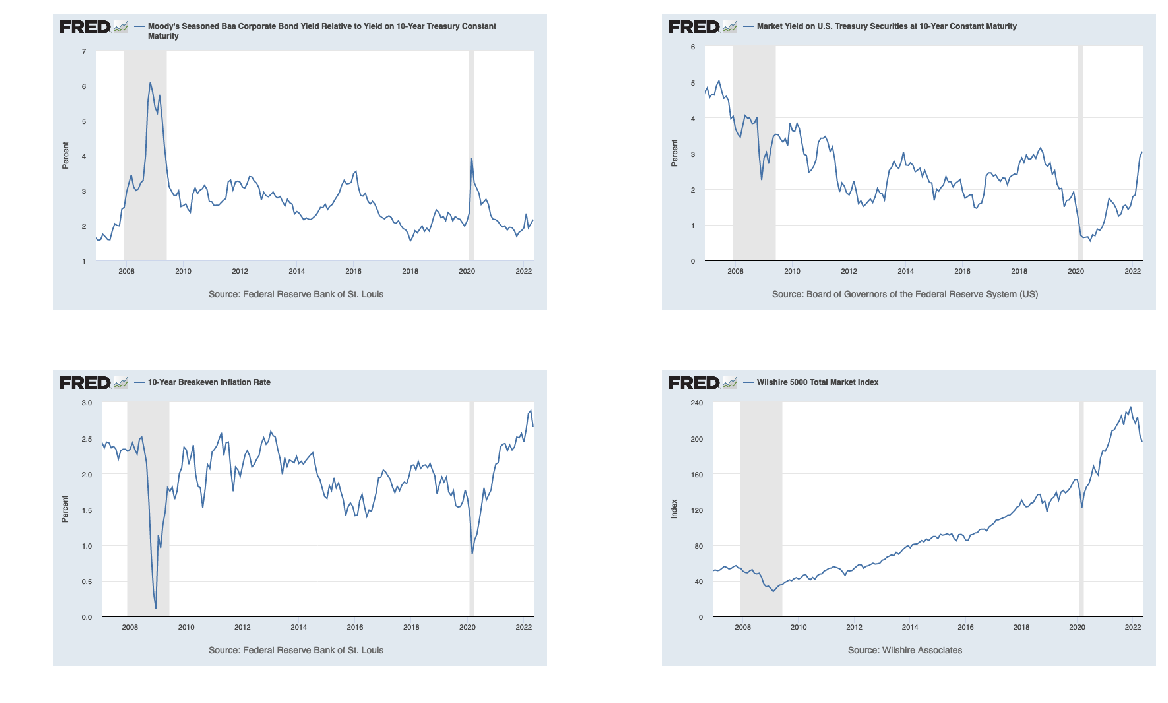

In [11]:
img_list = ["BAA10Y", "DGS10", "T10YIE", "WILL5000IND" ]
fig, axarr = plt.subplots(2,2)
i = 0

for series in img_list:
    r, c = divmod(i, 2)
    filename = "../fred/" + series + ".png"
    a = plt.imread(filename)
    axarr[r, c ].imshow( a )
    axarr[r, c ].set_axis_off()
    i += 1

plt.show()
    

## $\color{blue}{\text{3 - Topic Modeling of FOMC Statements}}$ <a id="section3"></a>

* Preprocessing and Vectorization of Corpus
    +  Stopwords - FOMC specifics
    +  Bigrams, WordNet Lemmatizer
   
* N = 5 Topics Suffice using LDA.  
    +  Each Topic is associated with 1 period of QE
    
* Interpretation
    +  High Frequency Words in each Topic
    +  Word Clouds
    +  Time Variation of Topic Weights

The FOMC text is enormously influential to financial markets, businesses and governments.   We ask how textual analysis
can shed light on the FOMC statements through the recent critical period of the twenty-first century.

Using Latent Dirichlet Allocation, we construct a topic model of the FOMC statements from 2007-2022.  
Between January 2007-May 2022, we found 126 relevant FOMC policy statements. 

Our chief findings are that $N=5$ topics are sufficient to allow economic interpretation.
While the LDA model seems to detect topics based on the Federal Reserve quantitative easing policy more than the target interest rate.
Moreover, the high frequency words don't necessary reveal the topic.
Instead, we discovered that the link to Quantitative easing when we examine the dates when topic weights fluctuate in each FOMC statement.

This section begins by preprocessing the FOMC statement corpus.  Next, we train the LDA model and report the topics textually 
and graphically.   Next, we report the Time Variation of the Topics and their interpretation.   Lastly, we consider coherence as a topic evaluation measure for FOMC statements.   In our discussion, we consider potentially useful business application of LDA topic modeling as an automated form of Fed-watching.



### $\color{green}{\text{ 3.1 - Pre-process and vectorize the documents}}$

The statements were download and extracted in a previous step for consumption.  There are 126 statements for use.  We use `gensim`, `nltk` to preprocess the corpus.


In [12]:
%matplotlib inline

In [13]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import logging
logging.disable()

In [14]:
import io
import os.path
import math
#import requests
#from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import gensim
import gensim.corpora as corpora
from gensim import models
import matplotlib.pyplot as plt
#import spacy
from pprint import pprint
from wordcloud import WordCloud
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import seaborn as sns
import re as re
import smart_open

# Prepare corpus
derived_data_dir = "../derived"

fomc_statements_file = derived_data_dir + "/" + "FOMC_statements.csv"

df_fomc_statements_raw = pd.read_csv( fomc_statements_file )

docs = df_fomc_statements_raw.text

In [15]:
df_fomc_statements_raw.tail()

statement_id        date  year  \
121           122  2021-11-03  2021   
122           123  2021-12-15  2021   
123           124  2022-01-26  2022   
124           125  2022-03-16  2022   
125           126  2022-05-04  2022   

                                                   url  \
121  https://www.federalreserve.gov/newsevents/pres...   
122  https://www.federalreserve.gov/newsevents/pres...   
123  https://www.federalreserve.gov/newsevents/pres...   
124  https://www.federalreserve.gov/newsevents/pres...   
125  https://www.federalreserve.gov/newsevents/pres...   

                                                  text  length chairperson  
121  The Federal Reserve is committed to using its ...     614      Powell  
122  The Federal Reserve is committed to using its ...     521      Powell  
123  Indicators of economic activity and employment...     430      Powell  
124  Indicators of economic activity and employment...     348      Powell  
125  Although overall economic activity edged down ...     366      Powell

In [16]:
ldocs = list(docs)


Following the approach suggested by [Radim Rehurek](https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html#sphx-glr-auto-examples-tutorials-run-lda-py) in his LDA tutorial, our steps include:

* Tokenize (split the documents into tokens).
* Lemmatize the tokens.
* Compute bigrams.
* Compute a bag-of-words representation of the data.
* Convert the bag-of-words to Term Document - Inverse Document Frequency Weighting.

First we tokenize the text using a regular expression tokenizer from NLTK. We
remove numeric tokens and tokens that are only a single character, as they
don't tend to be useful, and the dataset contains a lot of them.

We also add FOMC specific stopwords as they don't appear to add value to the statements.
These include the words `chair`, `vice`, `voting`, `committee` and `FOMC`.
They also include the first and last names of all FOMC members from 2007-2022.   These were identified manually on the Federal Reserve website.


In [17]:
# Tokenize the documents.
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# common stop words in the English language
en_stopwords = stopwords.words('english')

# FOMC stop words
FOMC_stopwords = ['chair', 'vice', 'voting', 'committee', 'FOMC' ,
                 'john', 'williams', 'bowman', 'michelle', 'lael', 'brainard',
                  'james', 'bullard', 'esther', 'george', 'loretta', 'mester',
                  'christopher', 'waller'
                  'ben', 'bernanke', 'richard', 'clarida', 'stanley', 'fischer',
                  'susan', 'bies', 'elizabeth', 'duke', 'donald', 'kohn', 
                  'randall', 'kroszner', 'frederic', 'mishkin' ,
                  'jerome', 'powell', 'randal', 'quarles', 
                  'sarah', 'raskin', 'jeremy', 'stein' , 'daniel', 'tarullo',
                  'kevin', 'warsh', 'janet', 'yellen', 'tom', 'barkin',
                  'raphael', 'bostic' , 'mary', 'daly', 'william', 'dudley' ,
                  'charles', 'evans', 'fisher', 'timothy', 'geithner', 
                  'patrick', 'harker' , 'eric', 'rosengren', 'gary', 'stern',
                  'thomas', 'hoenig', 'robert', 'kaplan', 'neel', 'kashkari' ,
                  'narayana', 'kocherlakota', 'jeffrey', 'lacker', 
                  'dennis', 'lockhart' , 'cathy', 'minehan', 'michael', 'moskow',
                  'susan', 'pianalto', 'charles', 'plosser', 'william', 'poole'
                 ]

all_stopwords = set( en_stopwords + FOMC_stopwords )

# Split the documents into tokens.
tokenizer = RegexpTokenizer(r'\w+')

for idx in range(len(ldocs)):
    ldocs[idx] = ldocs[idx].lower()  # Convert to lowercase.
    ldocs[idx] = tokenizer.tokenize(ldocs[idx])  # Split into words.

# Remove numbers, but not words that contain numbers.
ldocs = [[token for token in doc if not token.isnumeric()] for doc in ldocs]

# Remove words that are only one character.
ldocs = [[token for token in doc if len(token) > 1] for doc in ldocs]

We use the WordNet lemmatizer from NLTK. A lemmatizer is preferred over a
stemmer in this case because it produces more readable words. Output that is
easy to read is very desirable in topic modelling.




In [18]:
# Lemmatize the documents.
lemmatizer = WordNetLemmatizer()
lemma_docs = [[lemmatizer.lemmatize(token) for token in doc if token not in all_stopwords ] for doc in ldocs]

We find bigrams in the documents. Bigrams are sets of two adjacent words.
Using bigrams we can get phrases like "public_health" in our output
(spaces are replaced with underscores); without bigrams we would only get
"public" and "health".

Note that in the code below, we find bigrams and then add them to the
original data, because we would like to keep the words "public" and
"health" as well as the bigram "public_health".


In [19]:
# Compute bigrams.
from gensim.models import Phrases

# Add bigrams and trigrams to docs (only ones that appear 5 times or more).
bigram = Phrases(lemma_docs, min_count=10)
for idx in range(len(lemma_docs)):
    for token in bigram[lemma_docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            lemma_docs[idx].append(token)

We remove rare words and common words based on their *document frequency*.
Below we remove words that appear in less than 5 documents.
However, we keep words that appear in all documents like `inflation` because their
frequency and associated bigram phrases can be helpful.



In [20]:
# Remove rare and common tokens.
from gensim.corpora import Dictionary

# Create a dictionary representation of the documents.
dictionary = Dictionary(lemma_docs)

# Filter out words that occur less than 5 documents, or more than 100% of the documents.
dictionary.filter_extremes(no_below=5, no_above=1.0)

Finally, we transform the documents to a vectorized form. We simply compute
the frequency of each word, including the bigrams.




In [21]:
# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in lemma_docs]

Let's see how many tokens and documents we have to train on.

There are 754 tokens on 126 documents.



In [22]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))
print(dictionary)

Number of unique tokens: 754
Number of documents: 126
Dictionary(754 unique tokens: ['action', 'action_ben', 'additional', 'ben', 'chairman']...)


We decided to use the Term-Document Inverse Document Frequency measure as it allows infrequent words
to have a great topic forming impact.

In [23]:
TFIDF = models.TfidfModel(corpus) # Fit TF-IDF model
trans_TFIDF = TFIDF[corpus] # Apply TF-IDF model

### $\color{green}{\text{3.2 - Training}}$

We are ready to train the LDA model. 

#### Choosing the Number of Topics

How many topics should we use to train the model?  Our financial markets knowledge gives us some guidance although in the end there are no clear answers.  

*  First, the Federal Reserve has to a dual mandate:  managing inflation and promoting full employment consistent with a target level of inflation.   Thus, each statement is expected to address *inflation* and the *labor market*.

*  We know that a central bank is a lender of last resort.   It needs to rescue the national economy from financial crisis.
Thus, *financial crisis management* can be expected to be a relevant topic.  In particular, we can expect
    +   *quantitative easing*
    +   *extraordinary lending facility* (e.g. swap lines, TALF) to be potential topics.


*  The target Fed Funds rate is decided and announced at each FOMC meeting.  Thus, *rate setting* ought to be a topic.

*  Each statement also may provide forward guidance on the FOMC's trajectory of rate increases or crisis management measures.  This is consistent with the Federal Reserve's desire to improve transparency after the 2008 Financial crisis.

Because the statements are brief, we do not expect numerous topics to appear in the documents.  Parameter values in excess of 10 are likely to produce nonsensical results.   In addition, other academic research on the FOMC minutes suggest an optimal topic number of 8, see [Jegadeesh and Wu (2013)](https://doi.org/10.2139/ssrn.2939937).   We view FOMC minutes as an upper bound on the topic choice.  Minutes are lengthier versions of the meeting discussions associated with each FOMC statement. 

#### Other Tuning Parameters

We choose other parameters based on the simplest version of the LDA model that `gensim` supports.

``passes`` controls how often we train the model on the entire corpus.
Another word for passes might be "epochs". ``iterations`` is somewhat
technical, but essentially it controls how often we repeat a particular loop
over each document. It is important to set the number of "passes" and
"iterations" high enough.

We set ``alpha = 'auto'`` and ``eta = 'auto'``. Essentially we are automatically learning two parameters in
the model that we usually would have to specify explicitly.


#### Running the Model

Below, we run the model for $N=5$ topics which we decided is the optimal number of topics.   We use the extracted topic weights from the entire training corpus to see if each topic is used.   We discovered that LDA can created topics for which all documents in the training set have zero topic weight.

For $N=6$, we found the existence of a degenerate topic.
For $N=7$, we found a zero weight topic.

Thus, we choose $N=5$ because it is consistent with our a priori knowledge of FOMC statements and it avoids zero weight or degenerate topics.   A further tuning exercise below is done later using `U_Mass` coherence weight as a function of the number of topics.  This analysis does not recommend any useful optimal topic count.



In [24]:
# Train LDA model.
from gensim.models import LdaModel

# Set training parameters.
num_topics = 5
chunksize = 2000
passes = 30
iterations = 400
eval_every = None  # Don't evaluate model perplexity, takes too much time.
SEED = 12

# Make an index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

model = LdaModel(
    corpus=trans_TFIDF,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    num_topics=num_topics,
    random_state = SEED ,
    passes=passes,
    eval_every=eval_every
)

#### Extract Topic Ranking

The `gensim` framework is used to extract `U_Mass` topic coherence to rank the topic importance of each topic.

Within a model, the most coherent topic has the largest signed coherence.  
Between models of varying number of topics, the least signed coherence is preferred.

One unfortunate limitation of the `gensim` LDA model is that the native enumeration of `topic_id` does not provide the coherence score.
Meanwhile, the ranked order of topics provides the coherence scores but not `topic_id`.   So we have to join the coherence scores to `topic_id` indirectly by joining on related shared information.

The output of `top_topics` and `show_topics` includes the frequency of all words within each topic.
Thus, we join the two datasets on the common data element of:

* the probability of the leading word in each topic.

This is likely to be unique whereas the joining on the leading word will usually fail as topics often share the same leading words.

In [25]:
top_topics = model.top_topics(corpus = trans_TFIDF )

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

Average topic coherence: -1.4533.


In [26]:
topics = model.show_topics(num_words=1, formatted=False)
pprint(topics)

[(0, [('purchase', 0.008475071)]),
 (1, [('board', 0.009046477)]),
 (2, [('flow_credit', 0.008720476)]),
 (3, [('coming_quarter', 0.0069321087)]),
 (4, [('strong', 0.008922648)])]


In [27]:
rank = 0
topics_ranked = []
for word_props, coherence in top_topics:    
    rank += 1
    probs, words  = zip(*word_props)
    top_word = words[0]
    top_prob = probs[0]
    
    topics_ranked.append( [ rank, top_word, top_prob, coherence ] )
    
df_topics_ranked = pd.DataFrame( topics_ranked, columns = ["rank", "top_word", "top_prob", "coherence" ] )    

df_topics_ranked.head(10)     

rank        top_word  top_prob  coherence
0     1     flow_credit  0.008720  -0.348400
1     2        purchase  0.008475  -0.402065
2     3          strong  0.008923  -1.190280
3     4           board  0.009046  -1.794918
4     5  coming_quarter  0.006932  -3.530968

In [28]:
topics_native = []

for topic_id, word_tuple in topics:
    
    topic_top_word = word_tuple[0][0]
    topic_top_prob = word_tuple[0][1]

    topics_native.append( [ topic_id, topic_top_word, topic_top_prob ] )

df_topics_native = pd.DataFrame( topics_native, columns = [ "topic_id", "topic_top_word", "topic_top_prob" ] )   
        
df_topics_native.head(10)


topic_id  topic_top_word  topic_top_prob
0         0        purchase        0.008475
1         1           board        0.009046
2         2     flow_credit        0.008720
3         3  coming_quarter        0.006932
4         4          strong        0.008923

The resulting list of topics is shown below.

In [29]:
df_merge = df_topics_ranked.merge( df_topics_native, how = "left", 
                                  left_on = "top_prob", 
                                  right_on = "topic_top_prob" )[["top_word", "rank", "topic_id" , "top_prob", 
                                                                 "coherence" ] ]


df_topic_names = pd.DataFrame( data=[ ( 1 , 'QE4' ) , ( 2, 'QE3' ), (3 , 'QE-HALT' ), ( 4, 'QE1' ), (5, 'QE2' ) ], columns = ['rank', 'Topic'] )

df_merge = df_merge.merge( df_topic_names, how = 'left', on = 'rank' )

df_merge.head()

top_word  rank  topic_id  top_prob  coherence    Topic
0     flow_credit     1         2  0.008720  -0.348400      QE4
1        purchase     2         0  0.008475  -0.402065      QE3
2          strong     3         4  0.008923  -1.190280  QE-HALT
3           board     4         1  0.009046  -1.794918      QE1
4  coming_quarter     5         3  0.006932  -3.530968      QE2

### $\color{green}{\text{3.3 -  Analysis of Topics}}$

We analyze the LDA topics in several ways.

*  Examine highest frequency words.

*  Word Clouds

*  Time Series of Topic Weights within the training corpus

*  2 dimensional PCA analysis of intertopic distance.

In this case, we will conclude that time series analysis provides the most useful insights.  However, we consider
each method in turn and check for insights.

#### Plotting Frequency Charts

We plot the frequencies of each topic's top 20 words in the below panel of barplots.
Above each barplot, we show in the chart title:

*   Topic ID
*   Topic Description
*   Topic Coherence
*   Topic Rank

For $K=5$ topics:

*  We observe that there are no degenerate topics.
*  We will defer interpretation of topics until we look at the time series of document topic weights.




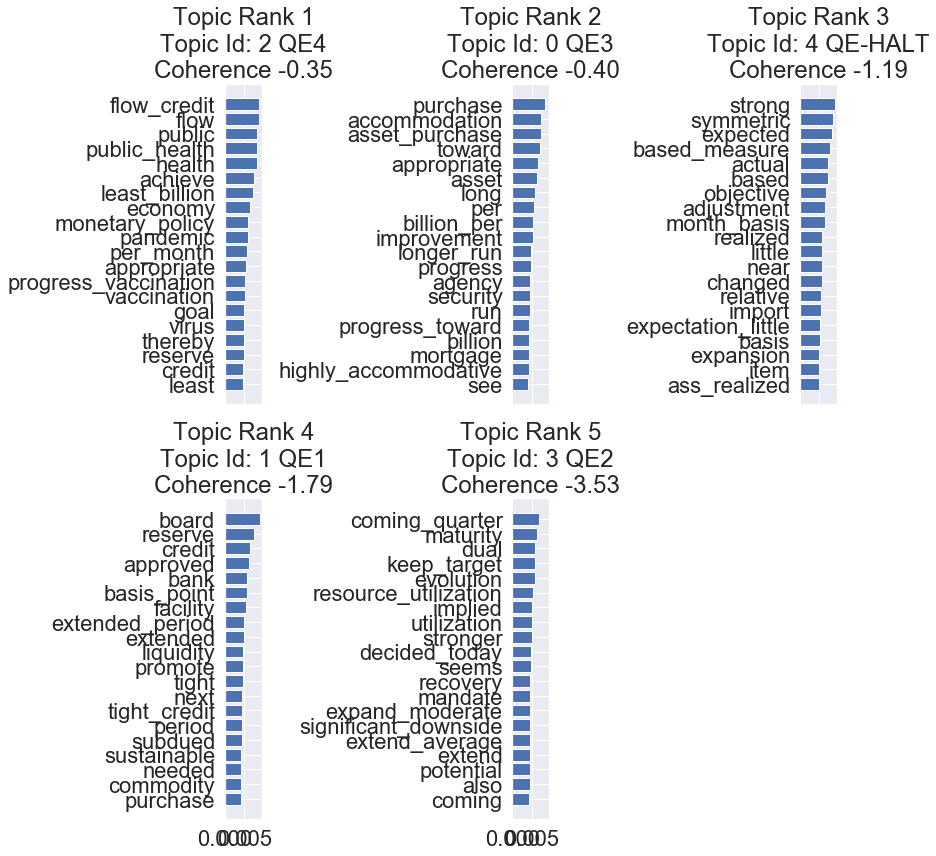

In [30]:
# Put all topic word subplots in a 2 row layout

rows = 2
cols = math.ceil( num_topics / 2 ) 

fig, axs = plt.subplots(nrows=rows, ncols=cols, sharex=True, figsize=(12, 12))
topic_rank = 0

for word_props, coherence in top_topics:
    
    row, col = divmod(topic_rank, cols )
    ax = axs[ row, col]
    probs, words  = zip(*word_props)
    
    ax.barh(words, probs)
    ax.invert_yaxis()
    topic_rank += 1
    
    topic_id = df_merge[ df_merge["rank"] == topic_rank ].iloc[0,2 ]
    topic_desc = df_merge[ df_merge["rank"] == topic_rank ].iloc[0,5 ]

    ax.set_title('Topic Rank {}\nTopic Id: {} {}\nCoherence {:.2f}'.format(topic_rank, topic_id , topic_desc, coherence))

# Delete empty subplots
for topic_rank in range( num_topics, rows * cols ):

    row, col = divmod(topic_rank, cols)
    ax = axs[ row, col]
    plt.delaxes( ax )
    topic_rank += 1
    
plt.tight_layout()
plt.show()

#### Findings

What have we learned from the above frequency charts for each topic?

*   Topic ID 4 (`QE4`) is associated with the economic crisis induced by the Covid pandemic.  This is evident from the use of the high frequency words: `public`, `public_health` and `pandemic`, `virus`, `vaccination`.

*   Topic ID 0 (`QE3`) is associated with quantitative easing and asset purchases.  So we can confidently associated Topic 0 with Quantitative easing.  But since the FOMC has initiated multiple rounds of QE, we don't know which one the FOMC supports.   We will resolve this puzzle in the later section.

*   Topics 4, 1 and 3 are more ambiguous.   Studying the words does not tell you the key feature of the topic and they are all similar.   Moreover, the highest frequency words are non-specific.  `strong`, `symmetric`, `board`, `reserve`, `coming_quarter`, `maturity` are the top frequency words, but they don't less anything.

We need to look at other methods to extract the topic interpretations.

#### Plotting Word Clouds

Word Clouds are generally less useful than frequency charts, but they allow overlooked words to be detected.
In this case, they are uninformative.

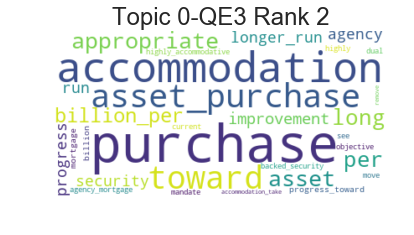

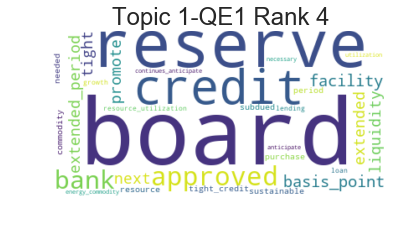

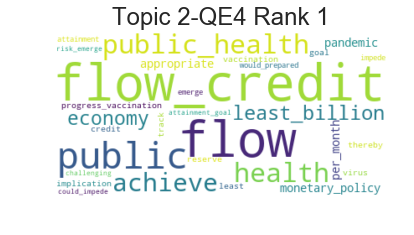

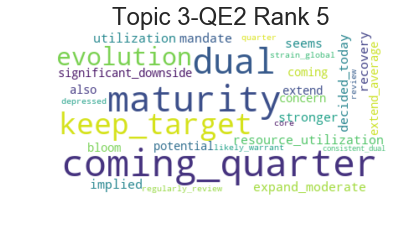

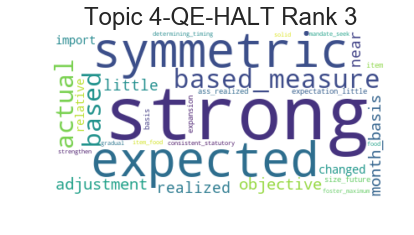

In [32]:
topic = 0 # Initialize counter
topic_rank = 0

while topic < num_topics:
    # Get topics and frequencies and store in a dictionary structure
    topic_words_freq = dict(model.show_topic(topic, topn=30)) # NB. the 'dict()' constructor builds dictionaries from sequences (lists) of key-value pairs - this is needed as input for the 'generate_from_frequencies' word cloud function
    
    # Generate Word Cloud for topic using frequencies
    wordcloud = WordCloud(background_color="white", random_state = 15).generate_from_frequencies(topic_words_freq) 
    
    topic_desc = df_merge[ df_merge["topic_id"] == topic ].iat[0, 5 ]
    topic_rank = df_merge[ df_merge['topic_id'] == topic ].iat[0, 1]
    
    plt.title("Topic {}-{} Rank {}".format(topic , topic_desc, topic_rank))    
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    topic += 1



#### Time Series

Finally, we consider the time evolution of each topic within the training corpus.

Each document is assigned a set of topics and weight.  The assigned topic identifiers follow the
internal numbering convention of the model.   After obtaining the set of all topic weights for all documents,
we will construct a dataframe $X$ of dimension $D \times T$ where $X(d,t)$ is the weight of document $d$ in topic $t$.
However, when $d$ has no association with topic $t$, $X(d,t) = 0$.



In [33]:

topic_history = []

for i in range(len(trans_TFIDF)):
    list_tuples = model[trans_TFIDF[i] ]
    for v in list_tuples:
        topic_id = v[0]
        topic_weight = v[1]
        topic_history.append( dict( zip( [ "statement_id", "topic_id", "topic_weight"] ,
                                         [ (i+1), topic_id, topic_weight ] ) ) )
        #print(i , " ", topic_id , " wt: ", topic_weight )
df_topic_history = pd.DataFrame( topic_history )

df_topic_history.head()

statement_id  topic_id  topic_weight
0             1         3      0.970152
1             2         3      0.969345
2             3         3      0.970305
3             4         3      0.971399
4             5         3      0.973179

We transform the skinny table into a $D \times T$ dataframe using `pivot_table` functionality in pandas.

In [34]:
piv_topic_history = pd.pivot_table( df_topic_history, values = 'topic_weight', index = ['statement_id'], 
                                   columns = 'topic_id' ,
                                   fill_value = 0)
piv_topic_history.columns.name=None


Next, we add the FOMC statement date column as the dataframe index and drop the previous indices.

In [35]:
piv_topic_history["date"] = pd.to_datetime( df_fomc_statements_raw["date"].tolist() )
piv_topic_history.reset_index(inplace=True)
piv_topic_history = piv_topic_history.reset_index( drop = True )
piv_topic_history.set_index('date', inplace = True )

topic_weights_hist = piv_topic_history.loc[:, piv_topic_history.columns != 'statement_id'].copy(deep=True)

topic_weights_hist.head()

0    1    2         3    4
date                                    
2007-01-31  0.0  0.0  0.0  0.970152  0.0
2007-03-21  0.0  0.0  0.0  0.969345  0.0
2007-05-09  0.0  0.0  0.0  0.970305  0.0
2007-06-28  0.0  0.0  0.0  0.971399  0.0
2007-08-07  0.0  0.0  0.0  0.973179  0.0

For ease of reading, we rename the columns from the topic i to the Quantitative easing topic descriptions.

In [36]:
topic_weights_hist.rename( columns = { 0 : 'QE3' , 1 : 'QE1' , 2 : 'QE4', 3 : 'QE2' , 4 : 'QE-HALT' }, inplace =True )

In [37]:
topic_weights_hist.head()

QE3  QE1  QE4       QE2  QE-HALT
date                                        
2007-01-31  0.0  0.0  0.0  0.970152      0.0
2007-03-21  0.0  0.0  0.0  0.969345      0.0
2007-05-09  0.0  0.0  0.0  0.970305      0.0
2007-06-28  0.0  0.0  0.0  0.971399      0.0
2007-08-07  0.0  0.0  0.0  0.973179      0.0

#### All Topics At Once

Before we examine each topic's history individually, we display them jointly.   A few observations are in order.

*   The topics display sharp boundary behavior.   Topics go in and out of use without significant transition.
This suggests that the LDA model is effective in detecting different subjects.

*   The topic transitions occur concurrently.  When one topic fades in importance, another topic takes over in importance.
This is consistent with the topic languages shiftly due to policy and the boiler plate language.

*   The sum of the topic weights do not exceed 100%.

*   Topic 0 (QE3) is clearly associated with quantitative easing because the highest frequency words:  `purchase`, `asset_purchase`, `accomodation`.

Text(0.5,1,'All Topic Weights 2007-2022')

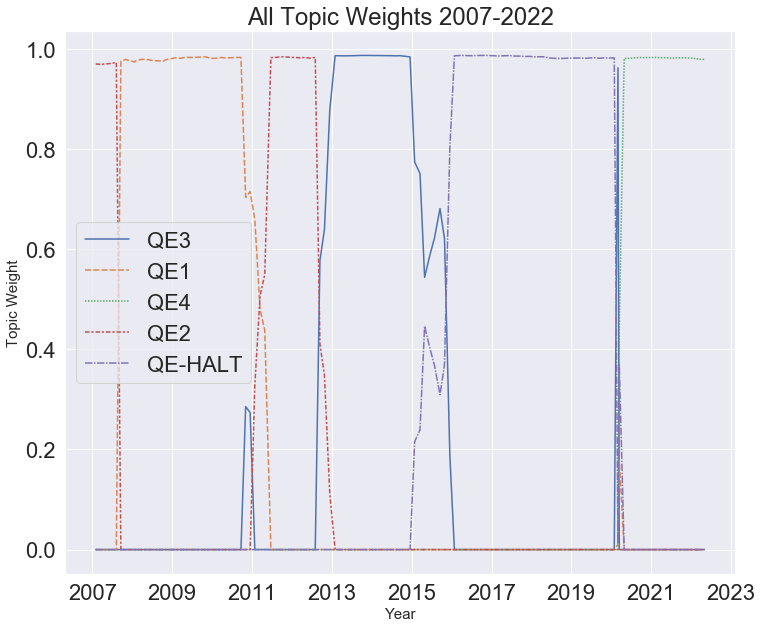

In [38]:
sns.set(rc = {'figure.figsize': (12,10) } )
sns.set(font_scale = 2 )
p = sns.lineplot( data=topic_weights_hist )
p.set_ylabel( "Topic Weight" , fontsize = 15 )
p.set_xlabel( "Year", fontsize = 15 )
plt.title("All Topic Weights 2007-2022")

In [39]:
sns.set(rc = {'figure.figsize': (6,6) } )
sns.set(font_scale = 1.3 )

#for i in range(num_topics):
#    if i in set(piv_topic_history.columns):    
#        sns.lineplot( data=piv_topic_history[[i]])
#        topic_rank = df_merge[ df_merge['topic_id'] == i ].iat[0, 1]
#        plt.title("Topic {}  Rank {}".format(i, topic_rank ) )
#        plt.show()

In [40]:
def show_panel_topic_weights():

    rows = 2
    cols = math.ceil( num_topics / 2 ) 

    fig, axs = plt.subplots(nrows=rows, ncols=cols, sharex=True, figsize=(18, 12))

    for i in range(num_topics):
        if i in set(piv_topic_history.columns): 
        
            row, col = divmod(i, cols )

            ax = axs[ row, col]
            p = sns.lineplot( data=piv_topic_history[[i]], ax = ax)
            p.set_ylabel( "Topic Weight" , fontsize = 15 )
            topic_rank = df_merge[ df_merge['topic_id'] == i ].iat[0, 1]
            topic_desc = df_merge[ df_merge['topic_id'] == i ].iat[0, 5]
            ax.title.set_text("Topic {} Rank {}".format( topic_desc, topic_rank ) )
    


    plt.tight_layout()
    plt.show()

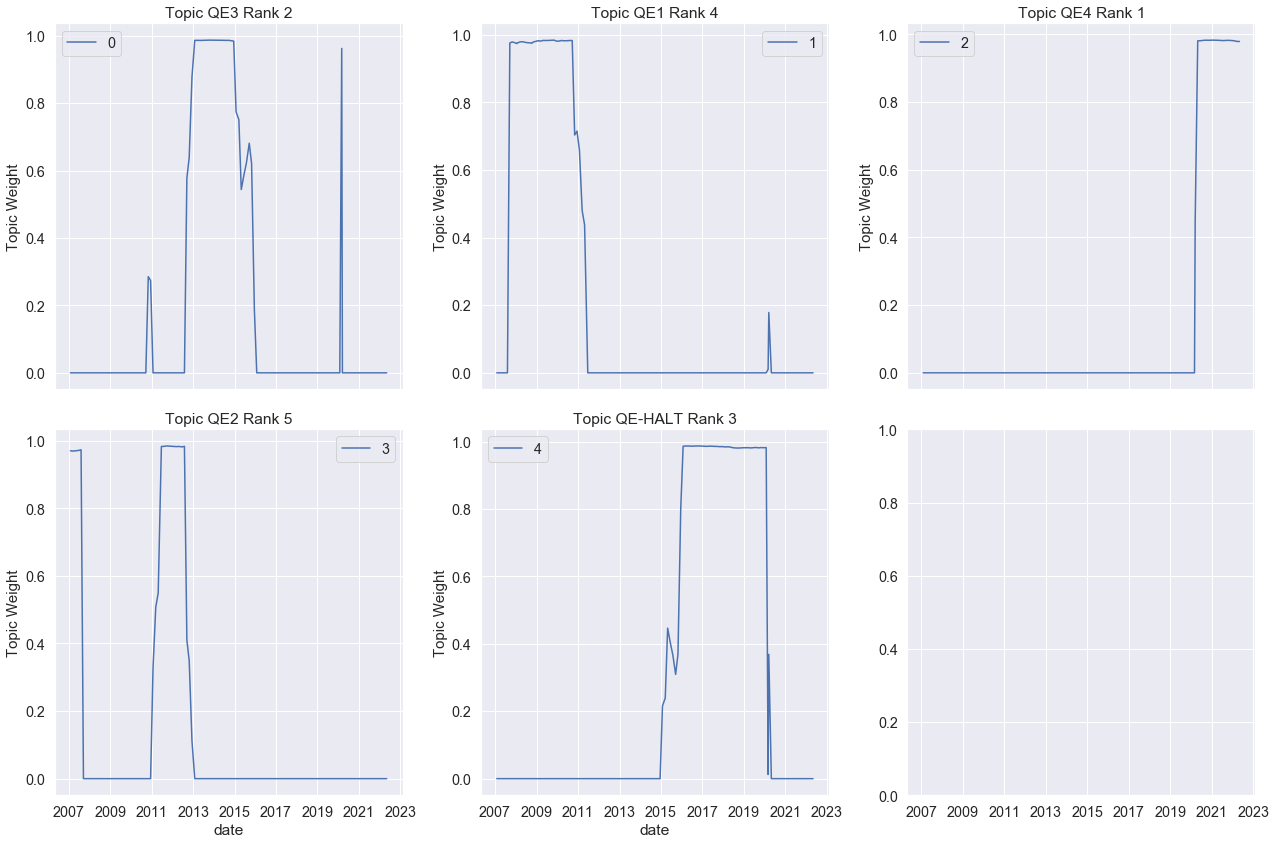

In [41]:
show_panel_topic_weights()

#### Mapping Topics to Quantitative Easing Regimes

Quantitative easing (QE) is the central bank strategy to support financial markets by buying assets using the central bank's unlimited balance sheet.
Wikipedia observes:

>Quantitative easing is an unconventional form of monetary policy, which is usually used when inflation is very low or negative, and when standard monetary policy instruments have become [ineffective.](https://en.wikipedia.org/wiki/Quantitative_easing#United_States)

This approach was necessary in the 2007-2022 period because interest rates were so low.   When the Central bank hits the zero lower bound on interest rates, the bank's ability to encourage credit and investment is limited because interest rates cannot be lowered further.

Instead, the bank has embarked on four successive waves of asset purchases called QE1, QE2, QE3 and QE4.  See [Quantitative Easing](https://en.wikipedia.org/wiki/Quantitative_easing) for more details of the monetary policy and its implementation by major central banks.  We note that there is not universal agreement on the chronology and even naming of the waves of quantitative easing.   We follow the chronology and naming in [Wikipedia](https://en.wikipedia.org/wiki/Quantitative_easing#United_States) but note that [The Balance](https://www.thebalance.com/what-is-quantitative-easing-definition-and-explanation-3305881) give different dates and even consider QE4 to be an extension of QE3.




The following amazing chart below from the visualcapitalist.com shows the phases and amounts of purchases with each wave of quantitative easing.
(https://www.visualcapitalist.com/the-feds-balance-sheet-the-other-exponential-curve/)

<img src="../raw/fed-balance-sheet-exponential-covid-19.jpg" width="1200" />




The table below summarizes the QE program dates when the Federal Reserve started and ended buying of assets and compares them to the dates when each topic has significant non-zero weight (typically more than 10%).


In [42]:
list_qe = [ ( 1 ,  'flow_credit, flow, public, public_health' , 'QE4' , 'March 15, 2020 - May 04, 2022' , 'March 2020 - March 2022' ) ,
            ( 2 ,  'purchase, accomodation, asset_purchase, toward' , 'QE3' , 'Sep 13, 2012-Oct 28, 2015, Mar 03, 2020' , 'Sep 2012-Oct 2014' ) ,
            ( 3 ,  'strong, symmetric, expected, based_measure' , 'QE-HALT' , 'Jan 28, 2015-Jan 29, 2020' , 'Nov 2015-Feb 2020' ) ,
            ( 4 ,  'board, reserve, credit, approved' , 'QE1' , 'Sep 18, 2007-Apr 27, 2011' , 'Nov 2008-Sep 2010' ) ,
            ( 5 ,  'coming_quarter, maturity, dual, keep_target' , 'QE2' , 'Jan 26, 2011-Oct 24, 2012' , 'Nov 2010-June 2011' ) 
          
          ]

df_qe = pd.DataFrame( data = list_qe , columns = ['Rank', 'Key Words', 'Topic' , 'LDA-Dates' , 'Actual-Dates' ] )
df_qe.reset_index( drop= True )
heading_properties = [('font-size', '18px')]

cell_properties = [('font-size', '16px')]

dfstyle = [dict(selector="th", props=heading_properties), dict(selector="td", props=cell_properties)]

df_qe.style.set_table_styles(dfstyle)


The date alignment of the start of QE4 and QE3 are very close to the actual QE policy changes.   The end of the QE is sometimes left clearly identified by the LDA algorithm.   The halt of QE1 is not well identified.  But the entire 2007-2008 period was an extended series of increasingly severe financial market disruptions.  The identification of QE2 is quite close (within 3 months).

While the high frequency words of each topic does not appear to suggest a change in QE policy, the time evolution of topic weights gives us more precise, hidden patterns.

In [43]:
from IPython.display import HTML
css_str = '<style> \
.jp-icon-warn0 path {fill: var(--jp-warn-color0);} \
.bp3-button-text path { fill: var(--jp-inverse-layout-color3);} \
.jp-icon-brand0 path { fill: var(--jp-brand-color0);} \
text.terms { fill: #616161;} \
</style>'
display(HTML(css_str))

### Interactive Visualization Of Topics

We also evaluate the LDA model interactively using the `pyLDAvis` package below.

The `pyLDAvis` visualization produces an intertopic distance map using MDS (multidimensionsal scaling) to produce
a principal components plot of PCA dimensions 1 and 2 (labelled `PC1`, `PC2`).    

The main conclusion from this plot is that $K=5$ topic model has well-separated topics.  Strong topic separation implies the model is able to distinguish topics and gives us greater confidence in the model fit.  Topics are well separated when their associated circles don't overlap in the intertopic distance map.
In this case, the only overlaps occur between  `QE1` (the circle labeled 2) and `QE2` (the circle labeled 4).

We do not see any business insights about the FOMC statements from the PCA visualization.  Moreover, the term bar chart is nearly equivalent in content to the earlier frequency bar charts.  

In [45]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare( model, trans_TFIDF , dictionary, sort_topics = False)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.004614  0.010697       1        1  23.092705
1      0.084270 -0.038917       2        1  20.731494
2     -0.004024  0.099616       3        1  13.837018
3      0.038960 -0.032001       4        1  12.748674
4     -0.123821 -0.039394       5        1  29.590109, topic_info=               Term      Freq     Total Category  logprob  loglift
114           board  3.000000  3.000000  Default  30.0000  30.0000
714     flow_credit  2.000000  2.000000  Default  29.0000  29.0000
713            flow  2.000000  2.000000  Default  28.0000  28.0000
717          public  2.000000  2.000000  Default  27.0000  27.0000
718   public_health  2.000000  2.000000  Default  26.0000  26.0000
..              ...       ...       ...      ...      ...      ...
462       objective  2.619749  4.332728   Topic5  -5.0174   0.7146
267      strengthen  1.940606  2.746959   Topic5  -5.3175   0.8702
112           basis  2.027751  3.327215   Topic5  -5.2736   0.7225
327         gradual  1.953541  2.998630   Topic5  -5.3109   0.7892
487  foster_maximum  1.843595  2.688449   Topic5  -5.3688   0.8405

[250 rows x 6 columns], token_table=      Topic      Freq                   Term
term                                        
468       1  0.670606          accommodation
569       1  0.616678     accommodation_take
684       5  0.961317  accommodative_thereby
711       3  0.527190                achieve
664       5  0.897452                 actual
...     ...       ...                    ...
632       1  0.709246            view_normal
694       5  0.948921          view_realized
734       3  0.695930                  virus
374       2  0.653647                 wealth
749       3  0.749619         would_prepared

[267 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5])

From the `pyLDAvis` visualization, we conclude that the topics are well separated.   A lack of overlapping circles, each of which represents a topic, tells us that the model is doing a good job in identifying distinct topics.  In this case, the only overlaps occur between  `QE1` (the circle labeled 2) and `QE2` (the circle labeled 4).

We do not see any business insights about the FOMC statements from the PCA visualization.  Moreover, the term bar chart is nearly equivalent in content to the earlier frequency bar charts.  

## Optimization Based on Coherence

Given our discovery that the LDA topics align with the Quantitative Easing regimes, it is not surprisingly that
topic searches higher than $K=5$ topics appear unstable below.   LDA is seeking to match topics but they become more granular.
In some cases, model coherence minimizes the U_Mass coherence but generally it seems a tenuous decision rule to calibrate the number of topics.

In [46]:
mod_results = []

for nt in [ 2, 3, 4, 5, 6, 7, 8, 9]:
     # Set training parameters.
     chunksize = 2000
     passes = 30
     iterations = 400
     eval_every = None  # Don't evaluate model perplexity, takes too much time.
     SEED = 12

     # Make an index to word dictionary.
     temp = dictionary[0]  # This is only to "load" the dictionary.
     
     ldamod = LdaModel(
          corpus=trans_TFIDF,
          id2word=id2word,
          chunksize=chunksize,
          alpha='auto',
          eta='auto',
          num_topics=nt,
          random_state = SEED ,
          passes=passes,
          eval_every=eval_every
     )
     
     cur_top_topics = ldamod.top_topics(corpus = trans_TFIDF )
     # Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
     avg_topic_coherence = sum([t[1] for t in cur_top_topics]) / nt
     #print('Average topic coherence: %.4f.' % avg_topic_coherence, "length: ", len(top_topics ) )
     
     mod_results.append( ( nt,  avg_topic_coherence ) )



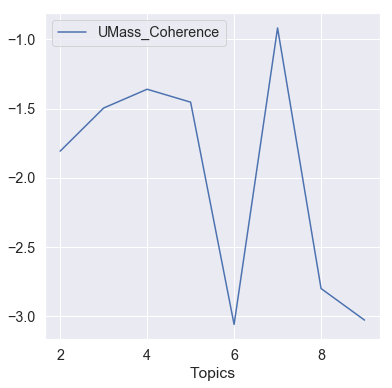

In [47]:
df_mod_results = pd.DataFrame( mod_results , columns = ['Topics', 'UMass_Coherence'] )
df_mod_results.plot(x="Topics", y = "UMass_Coherence")

## Discussion

The text patterns of the FOMC statements appear to change when new programs of Quantitative easing are introduced.
This is consistent with the central bankers wishing to signal a change of monetary policy through a change in text style.
The views of market participants will be moved by single adjective changes between consecutive statements.
Consequently, when LDA -- a relatively blunt instrument -- is able to detect topic changes, it foreshadows real policy changes by the FOMC.

It is easy to understand why the topic change is detected accurately by LDA when a new wave of QE starts.
However, it is harder to understand why the topic change detection is less accurate when QE ends.

One possible explanation for this assymmetry is that the curtailment of asset purchases depends on data conditions.
Another reason is that new QE requires more upfront explanation, while terminating QE simply involves slowing asset purchases
and not reinvesting maturing proceeds.

It is unclear if LDA topic weight changes can replace more sophisticated human expert in this area.  Besides the FOMC statements, a human analyst
would examine FOMC minutes, transcripts, Beige Book, Blue Book , speeches and market commentary from other experts.  These works would shed
insight beyond what an LDA model can provide.  However, LDA provides a concrete measurement of what an analyst may struggle to express in words, his subjective opinion of future FOMC decision making.


## $\color{blue}{\text{4 - Sentiment Analysis of FOMC Statements}}$ <a id="section4"></a>

## $\color{blue}{\text{5 - Conclusion}}$  <a id="section5"></a>

## $\color{blue}{\text{6 - References}}$  <a id="section6"></a>

<a id="Rossa2013">Carlo Rossa, 2013.</a>  **"The Financial Market Effect of FOMC Minutes"**  Economic Policy Review, Vol. 19, No. 2, 2013  (https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2378398)

<a id='GuKurovWolf2018'>Gu, Chen & Kurov, Alexander & Wolfe, Marketa Halova, 2018.</a> **"Relief Rallies after FOMC Announcements as a Resolution of Uncertainty,"** Journal of Empirical Finance, Elsevier, vol. 49(C), pages 1-18.

<a id='LuccaTrebbi2009'>David O. Lucca & Francesco Trebbi, 2009.</a> **"Measuring Central Bank Communication: An Automated Approach with Application to FOMC Statements,"** NBER Working Papers 15367, National Bureau of Economic Research, Inc. (https://www.nber.org/papers/w15367)

<a id='CieslakMorseVissingJorgensen2019'> A Cieslak, A Morse, A Vissing-Jorgensen, 2019.</a> **"Stock returns over the FOMC cycle"**, Journal of Finance 74(5), 2201-2248 (https://drive.google.com/file/d/1wpT8A2IpMYBP1ytt8n9mk9AdBsnfQ0Ps/view) 

<a id='Cannon2015'>Cannon, S. (2015).</a> **Sentiment of the FOMC: Unscripted.** Economic Review-Federal Reserve Bank of Kansas City, 5. (https://www.kansascityfed.org/documents/545/2015-Sentiment%20of%20the%20FOMC:%20Unscripted.pdf)

<a id='Gutierrez2020'>Gutierrez, L. F., Siami-Namini, S., Tavakoli, N., & Namin, A. S. (2020, December).</a> **A Concern Analysis of Federal Reserve Statements: The Great Recession vs. The COVID-19 Pandemic.** In 2020 IEEE International Conference on Big Data (Big Data) (pp. 2079-2086). IEEE. (https://arxiv.org/pdf/2012.02098.pdf

<a id="Lagana2020">Laganà, D. M. (2020).</a> **Federal reserve’s communication: a latent dirichlet allocation analysis with application to FOMC minutes.**  (http://tesi.luiss.it/27972/1/713391_LAGANA%27_DAISY%20MARTINA.pdf)


<a id="JegadeeshWu2017">Jegadeesh, N., & Wu, D. (2017).</a> **Deciphering Fedspeak: The information content of FOMC meetings.** SSRN (https://www.aeaweb.org/conference/2016/retrieve.php?pdfid=21466&tk=niAkBk3N)


## $\color{blue}{\text{7 - Appendices}}$ <a id="section7"></a>

## Technical Appendix

The data table for the QE program topics in the LDA model is shown below.

In [48]:
with pd.option_context('display.max_rows' , 200 ):
    print(topic_weights_hist )

                 QE3       QE1       QE4       QE2   QE-HALT
date                                                        
2007-01-31  0.000000  0.000000  0.000000  0.970152  0.000000
2007-03-21  0.000000  0.000000  0.000000  0.969345  0.000000
2007-05-09  0.000000  0.000000  0.000000  0.970305  0.000000
2007-06-28  0.000000  0.000000  0.000000  0.971399  0.000000
2007-08-07  0.000000  0.000000  0.000000  0.973179  0.000000
2007-09-18  0.000000  0.975816  0.000000  0.000000  0.000000
2007-10-31  0.000000  0.978990  0.000000  0.000000  0.000000
2007-12-11  0.000000  0.976799  0.000000  0.000000  0.000000
2008-01-22  0.000000  0.974007  0.000000  0.000000  0.000000
2008-01-30  0.000000  0.976185  0.000000  0.000000  0.000000
2008-03-18  0.000000  0.979066  0.000000  0.000000  0.000000
2008-04-30  0.000000  0.979544  0.000000  0.000000  0.000000
2008-06-25  0.000000  0.977396  0.000000  0.000000  0.000000
2008-08-05  0.000000  0.976586  0.000000  0.000000  0.000000
2008-09-16  0.000000  0.